In [117]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from ipywidgets import HBox
import numpy as np
from nested_lookup import nested_lookup
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
from IPython.display import display

from utils.widgets import *
from utils.search_dynamic import *
from utils.prepare_data import getJSON
from utils.mapviz import *
from utils.women import *

data = getJSON('data/records.json')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Librairies
You may install these librairies to use this notebook, if you already didn't run the requirement of the githubs repository. To install them, remove the # before the lines.

In [ ]:
#!pip install ipyleaflet
#!pip install unidecode
#!pip install gender_guesser
#!pip install matplotlib

## Show all the letters on a map
The first map shows all the letters sent and received by Alexander von Humboldt during his lifetime. The radius of the circle corresponds to the number of letters sent or received in that city. Each point therefore represents one or more letters. You can click directly on the dots to find out the exact number and to get more information about the letters.

In [115]:
all_on_map(data, 'coverage_location')

Map(center=[10, -2], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

This map represents all the letters sent and received by Alexander von Humboldt throughout his life. Each letter is represented by a dot. Each period of Alexander von Humboldt's life is represented by a colour, randomly defined by the programme. The darker the dot, the more letters were sent or received in that city. To find out the name of the city, you can click directly on the point on the map.

_This map may take some time to display._

In [116]:
map_by_period(sorted_by_period(data), 'coverage_location')

['#658567', '#fcedba', '#bc74b0', '#305d40', '#5ccebb', '#dd96ab']


HTML(value="<span style='background-color:#658567;font-weight: bold;'> 1830-1859 </span><span style='backgroun…

Map(center=[10, -2], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

## Search by date with map visualisation
The result of the search appears if there is only one letter left in the results or if there are no additional elements that would allow to deepen the search. 
To start a new search, please click on the "New search" button.

#### What data is used in the search?
The letters from Kalliope, the BnF and APS catalogues.
The data from the BBAW's research aid is not represented here because the place of delivery of the letters has not yet been digitally recorded. 

#### How is the result presented?
The result is represented on a world map. The points shown are the places where the letters were sent or received. As no difference has been made in the encoding of the letters in Kalliope, it is not possible to distinguish which place is the sending and receiving place. 
For some letters, no location is known and are therefore not shown on this map. 
Each point on the map is clickable and shows the information of the corresponding letter or letters. Thus, the city is mentioned as well as the exact date when known, the sender and the addressee, together with the place where the letter is currently kept. The link to the catalogue is also available.
Please note that only the information of 3 letters can be presented on the pop up. Thus, if more than three letters were sent to this location in the selected year, only the number of letters sent is mentioned but the individual information of each letter is not presented. 
To make sure that you have access to all the letters in the database for a selected date, please do a search in the jupyter notebook `search.ipynb` instead.


In [119]:
display(HBox([by_date(data), btn_new_search()]))

Map(center=[0.0, 0.0], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom_in_text', …

## Letters exchanged through time between a correspondence partner and AvH
The result of the search appears on a histogramm. It is possible that nothing is shown on the histogramm for some correspondence partner. That means that for all the letters sent between this person and AvH, no dates are known or have been recorded by the online catalogues. This also means that only letters with a known date are represented on the histogram.

To start a new search, please click on the "New search" button.

In [122]:
display(HBox([by_person(data), btn_new_search()]))

## Age distribution of correspondence partners of AvH
There is a hypothesis that the older Alexander von Humboldt got, the more he corresponded with younger researchers. With these graphs we have sought, not to answer this question entirely, but to find out the age distribution of AvH's correspondents over time. Of course, these graphs are biased by the data themselves: the data from the letters we use is only a sample of what is preserved today. What is preserved today is also only a tiny part of all the correspondence of AvH who did not keep all the letters he received when he was travelling for example. 

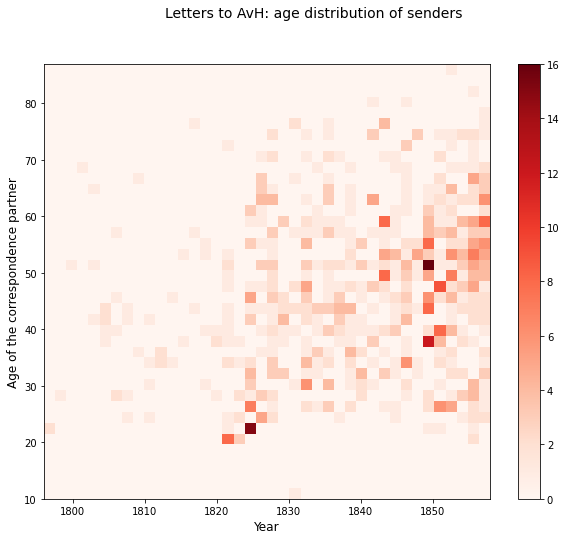

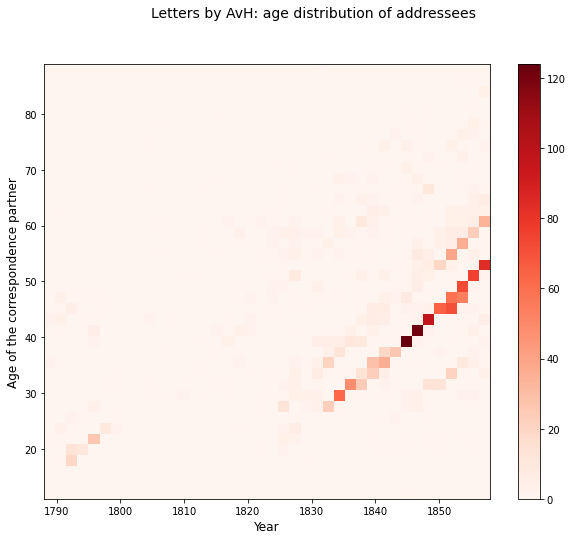

In [123]:
age_distribution()

## Age frequency of correspondence partners
The result of the search appears on a histogramm. 

In [124]:
fig= plt.figure(figsize=(10,5))
plt.hist(y_coords, bins=15)
fig.suptitle('Age frequency', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('#', fontsize=12)
plt.show()

NameError: name 'y_coords' is not defined

<Figure size 720x360 with 0 Axes>

## Women in AvH's correspondence

#### Some figures and facts
- Humboldt received 8 letters from women and sent 61 letters to women.
- Many are duchess, countess or even queen. 
- 2.3% of Humboldt's correspondence was sent to women. 
- 0.7% is the proportion of letters to AvH written by women.
- If we consider these figure, Humboldt wrote more letters to women than he received from them. But is it the historical truth ?
- All letters together correspond to 1.8% of AvH correspondence.

Like the previous graphs, this section on Humboldt's female correspondence is biased by current data and sources. The data from the letters we use is only a sample of what is preserved today. What is preserved today is also only a tiny part of all the correspondence of AvH who did not keep all the letters he received when he was travelling for example.

#### How is the result presented?
Two visualisations are proposed: 
1. The world map with the points where the corresponding letters are kept. 
2. The histogram of the exchanges between AvH and the selected person. It is possible that the histogram does not show any data, this means that no sending date is known for the corresponding letters. 


Map(center=[0.0, 0.0], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom_in_text', …

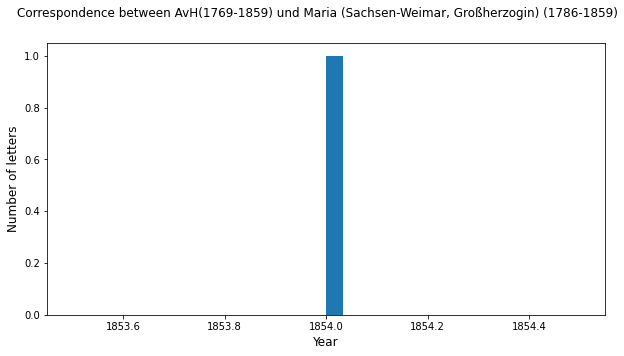

In [128]:
display(HBox([by_women(women_partner()), btn_new_search()]))